<a href="https://colab.research.google.com/github/wabinyai/AIRQO-web/blob/master/%5B08_April_2022%5DMakerere_Weather_and_Metrological_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip  install cartopy

In [6]:
pip install windrose

In [4]:
import pandas as pd
#import geopandas as gpd
import folium
import branca.colormap as cm
import matplotlib.pyplot as plt
#from iteration_utilities import duplicates
from google.colab import files
from folium.plugins import FastMarkerCluster
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")


# Metrological data

In [6]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TA00216.csv to TA00216 (2).csv
User uploaded file "TA00216.csv" with length 5309214 bytes


In [7]:
fname = fn
df = pd.read_csv(fname)
df.head()

,timestamp (UTC),atmosphericpressure S000220 AVG (kPa),atmosphericpressure S001002 AVG (kPa),atmosphericpressure S001544 AVG (kPa),precipitation S000220 (mm),precipitation S001002 (mm),precipitation S001544 (mm),radiation S000220 AVG (W/m2),radiation S001002 AVG (W/m2),radiation S001544 AVG (W/m2),...,temperature S001544 MIN (degrees Celsius),winddirection S000220 (degrees),winddirection S001002 (degrees),winddirection S001544 (degrees),windgusts S000220 MAX (m/s),windgusts S001002 MAX (m/s),windgusts S001544 MAX (m/s),windspeed S000220 AVG (m/s),windspeed S001002 AVG (m/s),windspeed S001544 AVG (m/s)
0,2018-01-01 00:00,87.691667,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,203.788162,NaN,NaN,0.93,NaN,NaN,0.296667,NaN,NaN
1,2018-01-01 01:00,87.650833,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,214.239503,NaN,NaN,1.21,NaN,NaN,0.292500,NaN,NaN
2,2018-01-01 02:00,87.681667,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,143.470040,NaN,NaN,1.31,NaN,NaN,0.424167,NaN,NaN
3,2018-01-01 03:00,87.722500,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,321.622037,NaN,NaN,1.60,NaN,NaN,0.441667,NaN,NaN
4,2018-01-01 04:00,87.779167,NaN,NaN,0.0,NaN,NaN,29.666667,NaN,NaN,...,NaN,280.324638,NaN,NaN,1.56,NaN,NaN,0.647500,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36869 entries, 0 to 36868
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   timestamp (UTC)                            36869 non-null  object 
 1   atmosphericpressure S000220 AVG (kPa)      11790 non-null  float64
 2   atmosphericpressure S001002 AVG (kPa)      13849 non-null  float64
 3   atmosphericpressure S001544 AVG (kPa)      8901 non-null   float64
 4   precipitation S000220 (mm)                 11790 non-null  float64
 5   precipitation S001002 (mm)                 5718 non-null   float64
 6   precipitation S001544 (mm)                 8901 non-null   float64
 7   radiation S000220 AVG (W/m2)               11790 non-null  float64
 8   radiation S001002 AVG (W/m2)               13850 non-null  float64
 9   radiation S001544 AVG (W/m2)               8901 non-null   float64
 10  relativehumidity S0002

In [9]:
# Conveting created_at from object to date time 
df['timestamp (UTC)'] = pd.to_datetime(df['timestamp (UTC)'], dayfirst=True)
df.rename(columns={'timestamp (UTC)':'Datetime'}, inplace=True)

In [10]:
df['atmospheric_pressure(kPa)'] = df[['atmosphericpressure S000220 AVG (kPa)','atmosphericpressure S001002 AVG (kPa)','atmosphericpressure S001544 AVG (kPa)']].mean(axis=1)
df['precipitation(mm)'] = df[['precipitation S001544 (mm)','precipitation S000220 (mm)','precipitation S001002 (mm)']].mean(axis=1)

df['Radiation'] = df[['radiation S000220 AVG (W/m2)','radiation S001002 AVG (W/m2)','radiation S001544 AVG (W/m2)']].mean(axis=1)
df['Relative_humidity'] = df[['relativehumidity S001544 AVG (-)','relativehumidity S001002 AVG (-)','relativehumidity S000220 AVG (-)']].mean(axis=1)
                                                
df['Temperature_AVR'] = df[['temperature S001544 AVG (degrees Celsius)','temperature S001002 AVG (degrees Celsius)','temperature S000220 AVG (degrees Celsius)']].mean(axis=1)
df['temperature_MAX (degrees Celsius)'] = df[['temperature S000220 MAX (degrees Celsius)','temperature S001002 MAX (degrees Celsius)','temperature S001544 MAX (degrees Celsius)']].mean(axis=1)
df['temperature_MIN (degrees Celsius)'] = df[['temperature S000220 MIN (degrees Celsius)','temperature S001002 MIN (degrees Celsius)','temperature S001544 MIN (degrees Celsius)']].mean(axis=1)
df['Wind_direction'] = df[['winddirection S001544 (degrees)','winddirection S001002 (degrees)','winddirection S000220 (degrees)']].mean(axis=1)
df['wind_gusts'] = df[['windgusts S001544 MAX (m/s)','windgusts S001002 MAX (m/s)','windgusts S000220 MAX (m/s)']].mean(axis=1)
df['Wind_speed'] =  df[['windspeed S001544 AVG (m/s)','windspeed S000220 AVG (m/s)','windspeed S001002 AVG (m/s)']].mean(axis=1)


In [11]:

df = df[['Datetime','atmospheric_pressure(kPa)','Wind_speed','wind_gusts','Wind_direction','temperature_MAX (degrees Celsius)','temperature_MIN (degrees Celsius)','Relative_humidity','Radiation','Temperature_AVR','precipitation(mm)','Radiation']]

In [18]:
df.head()

,Datetime,atmospheric_pressure(kPa),Wind_speed,wind_gusts,Wind_direction,temperature_MAX (degrees Celsius),temperature_MIN (degrees Celsius),Relative_humidity,Radiation,Temperature_AVR,precipitation(mm),Radiation
0,2018-01-01 00:00:00,87.691667,0.296667,0.93,203.788162,19.4,18.9,0.943667,0.000000,19.141667,0.0,0.000000
1,2018-01-01 01:00:00,87.650833,0.292500,1.21,214.239503,18.9,18.4,0.951667,0.000000,18.641667,0.0,0.000000
2,2018-01-01 02:00:00,87.681667,0.424167,1.31,143.470040,18.7,18.1,0.964667,0.000000,18.366667,0.0,0.000000
3,2018-01-01 03:00:00,87.722500,0.441667,1.60,321.622037,19.0,18.7,0.956000,0.000000,18.783333,0.0,0.000000
4,2018-01-01 04:00:00,87.779167,0.647500,1.56,280.324638,19.1,18.9,0.937833,29.666667,19.000000,0.0,29.666667


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36869 entries, 0 to 36868
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datetime                           36869 non-null  datetime64[ns]
 1   atmospheric_pressure(kPa)          34539 non-null  float64       
 2   Wind_speed                         34181 non-null  float64       
 3   wind_gusts                         34168 non-null  float64       
 4   Wind_direction                     34293 non-null  float64       
 5   temperature_MAX (degrees Celsius)  34523 non-null  float64       
 6   temperature_MIN (degrees Celsius)  34523 non-null  float64       
 7   Relative_humidity                  34008 non-null  float64       
 8   Radiation                          34540 non-null  float64       
 9   Temperature_AVR                    34523 non-null  float64       
 10  precipitation(mm)                 

In [ ]:
# Monthly data
monthly =df.set_index('Datetime').groupby(pd.Grouper(freq='H')).mean()
monthly = monthly.reset_index()
monthly

,Datetime,atmospheric_pressure(kPa),Wind_speed,wind_gusts,Wind_direction,temperature_MAX (degrees Celsius),temperature_MIN (degrees Celsius),Relative_humidity,Radiation,Temperature_AVR,precipitation(mm),Radiation
0,2018-01-01 00:00:00,87.691667,0.296667,0.93,203.788162,19.4,18.9,0.943667,0.000000,19.141667,0.0,0.000000
1,2018-01-01 01:00:00,87.650833,0.292500,1.21,214.239503,18.9,18.4,0.951667,0.000000,18.641667,0.0,0.000000
2,2018-01-01 02:00:00,87.681667,0.424167,1.31,143.470040,18.7,18.1,0.964667,0.000000,18.366667,0.0,0.000000
3,2018-01-01 03:00:00,87.722500,0.441667,1.60,321.622037,19.0,18.7,0.956000,0.000000,18.783333,0.0,0.000000
4,2018-01-01 04:00:00,87.779167,0.647500,1.56,280.324638,19.1,18.9,0.937833,29.666667,19.000000,0.0,29.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
36864,2022-03-17 00:00:00,87.463333,0.333333,1.38,4.016614,21.5,21.0,0.888417,0.000000,21.208333,0.0,0.000000
36865,2022-03-17 01:00:00,87.427500,0.894167,2.68,325.007172,21.8,21.3,0.786083,0.000000,21.625000,0.0,0.000000
36866,2022-03-17 02:00:00,87.450000,0.336667,1.37,335.768737,21.5,21.1,0.735750,0.000000,21.308333,0.0,0.000000
36867,2022-03-17 03:00:00,87.474167,0.630833,2.00,332.178795,21.6,21.3,0.703583,0.000000,21.441667,0.0,0.000000


In [13]:
pip install windrose

In [14]:
from windrose import WindroseAxes
import matplotlib.cm as cm
from matplotlib import pyplot as plt
import numpy as np

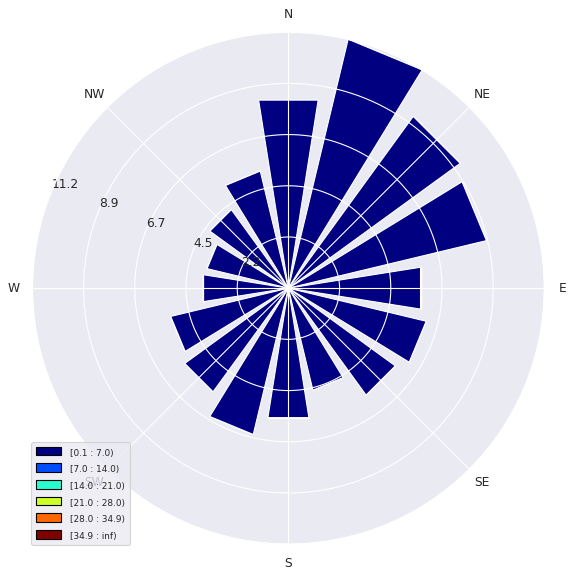

In [20]:
ax= WindroseAxes.from_ax()
ax.bar(df.Wind_direction, df.Wind_speed,normed=True , opening =0.8, edgecolor='white')
ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])
ax.set_theta_zero_location('N')
ax.set_legend()

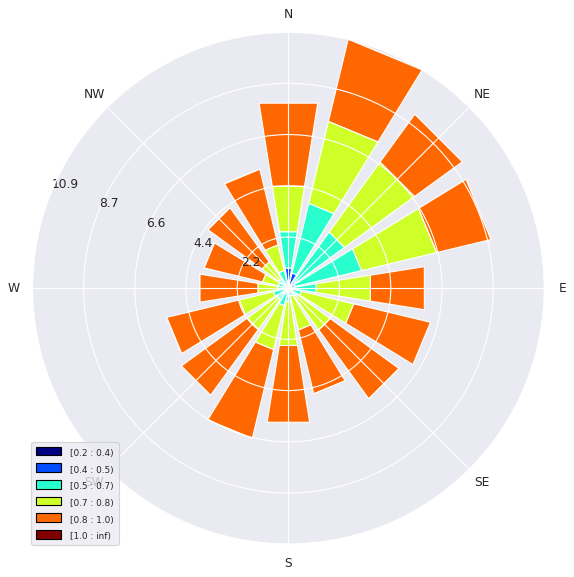

In [19]:
ax= WindroseAxes.from_ax()
ax.bar(df.Wind_direction, df.Relative_humidity,normed=True , opening =0.8, edgecolor='white')
ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])
ax.set_theta_zero_location('N')
ax.set_legend()

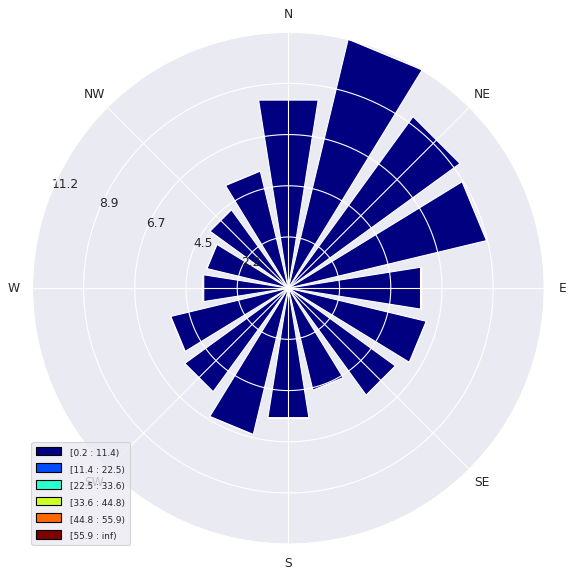

In [17]:
ax= WindroseAxes.from_ax()
ax.bar(df.Wind_direction, df.wind_gusts, normed=True , opening =0.8, edgecolor='white')
ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])
ax.set_theta_zero_location('N')
ax.set_legend()

In [24]:
df['Wind_speed'].max()

34.92181818181819

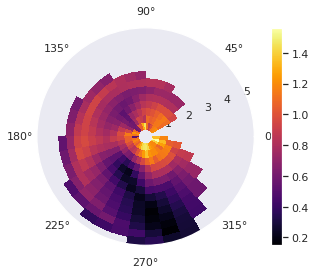

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

speed = [0.129438, 0.0366483, 0.439946, 0.090253, 0.19373, 0.592419, 0.00903306, 0.520847, 0.513714, 1.16971, 5.12548, 4.37745, 3.2362, 2.91004, 1.60186, 0.115595, 0.270153, 0.19367, 0.0865046, 0.558443, 0.613072, 0.648203, 0.0770592, 0.81772, 0.234523, 1.04013, 0.352675, 0.0673293, 0.492684, 0.109398, 0.402816, 0.140199, 0.998795, 0.367604, 0.52436, 0.0968265, 1.59786, 2.43149, 2.94133, 0.940624, 0.257224, 0, 0, 0.0199409, 0.125302, 0, 0.367911, 0.259797, 0.237776, 0.45428, 0.507738, 0.389389, 0.388758, 0.335398, 0.510133, 0.180295, 0.0738368, 0.780367, 0.925679, 1.93922, 1.96569, 1.39523, 0.824564, 0.00833059, 0, 0.0498536, 0.112622, 0, 0.00843256, 0.0269059, 0.00816307, 0.0582206, 0.578959, 1.0171, 2.24302, 1.92721]
direction = [189.538, 215.866, 264.086, 135.325, 165.893, 44.2853, 136.158, 350.437, 83.2484, 277.783, 288.064, 279.222, 267.214, 265.913, 235.173, 181.206, 136.14, 144.281, 134.581, 108.16, 75.4158, 22.2881, 328.882, 68.3736, 129.256, 278.097, 326.581, 35.7096, 321.297, 338.31, 354.109, 24.1976, 38.1465, 39.2318, 63.8145, 119.817, 186.106, 182.673, 185.475, 173.223, 139.843, np.nan, np.nan, 40.9179, 320.081, np.nan, 333.054, 354.726, 357.716, 18.1253, 355.461, 286.084, 319.073, 324.621, 339.681, 313.331, 346.647, 84.9661, 86.7814, 88.5452, 104.456, 128.953, 87.5388, 72.1999, np.nan, 345.5, 356.68, np.nan, 316.586, 338.82, 334.731, 98.3435, 85.669, 25.9086, 42.6986, 34.4194]
gas = [1.10986, 1.25806, 1.50921, 1.37323, 1.41317, 1.15709, 1.16005, 1.43474, 1.43952, 1.03368, 0.246893, 0.139811, 0.15603, 0.203752, 0.177984, 0.164834, 0.528146, 0.602864, 0.809435, 1.0036, 1.05669, 1.05348, 0.988772, 1.0588, 1.12066, 1.15746, 1.23219, 1.142, 1.21676, 1.27093, 1.00094, 1.16773, 1.16163, 1.1715, 0.999969, 0.863695, 0.832681, 0.92631, 1.01416, 1.02708, 1.0084, 1.00666, 1.06311, 1.32098, 1.48134, 1.60667, 1.60324, 1.58663, 1.41159, 1.3251, 1.25114, 1.24269, 1.16683, 1.20762, 1.0616, 1.21975, 1.21312, 1.11416, 0.981076, 0.707948, 0.590113, 0.515484, 0.417111, 0.436767, 0.644229, 0.998097, 1.24321, 1.45975, 1.3905, 1.50087, 1.63685, 1.53855, 1.21446, 1.09367, 0.790929, 0.693877]

dir_rad = np.radians(np.array(direction))
speed = np.array(speed)
gas = np.array(gas)

WD, WS = np.meshgrid(np.linspace(0, 2 * np.pi, 37), np.linspace(min(speed), max(speed), 16))
filter = np.isfinite(dir_rad)
Z = interpolate.griddata((dir_rad[filter], speed[filter]), gas[filter], (WD, WS), method='linear')

fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
cmap = plt.get_cmap('inferno')
img = ax.pcolormesh(WD, WS, Z, cmap=cmap)
plt.colorbar(img)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36869 entries, 0 to 36868
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datetime                           36869 non-null  datetime64[ns]
 1   atmospheric_pressure(kPa)          34539 non-null  float64       
 2   Wind_speed                         34181 non-null  float64       
 3   wind_gusts                         34168 non-null  float64       
 4   Wind_direction                     34293 non-null  float64       
 5   temperature_MAX (degrees Celsius)  34523 non-null  float64       
 6   temperature_MIN (degrees Celsius)  34523 non-null  float64       
 7   Relative_humidity                  34008 non-null  float64       
 8   Radiation                          34540 non-null  float64       
 9   Temperature_AVR                    34523 non-null  float64       
 10  precipitation(mm)                 

In [32]:
df.corr()

,atmospheric_pressure(kPa),Wind_speed,wind_gusts,Wind_direction,temperature_MAX (degrees Celsius),temperature_MIN (degrees Celsius),Relative_humidity,Radiation,Temperature_AVR,precipitation(mm),Radiation
atmospheric_pressure(kPa),1.000000,-0.076835,-0.034313,-0.020396,-0.290990,-0.319136,0.286253,0.087193,-0.306510,0.029623,0.087193
Wind_speed,-0.076835,1.000000,0.777877,-0.077198,0.340445,0.324874,-0.298046,0.312974,0.335236,0.028640,0.312974
wind_gusts,-0.034313,0.777877,1.000000,-0.043288,0.424498,0.388731,-0.361905,0.439228,0.410110,0.091571,0.439228
Wind_direction,-0.020396,-0.077198,-0.043288,1.000000,-0.152790,-0.144008,0.111590,-0.125931,-0.149733,-0.023286,-0.125931
temperature_MAX (degrees Celsius),-0.290990,0.340445,0.424498,-0.152790,1.000000,0.968448,-0.865610,0.732960,0.991646,-0.060104,0.732960
temperature_MIN (degrees Celsius),-0.319136,0.324874,0.388731,-0.144008,0.968448,1.000000,-0.870791,0.701931,0.990602,-0.129694,0.701931
Relative_humidity,0.286253,-0.298046,-0.361905,0.111590,-0.865610,-0.870791,1.000000,-0.589083,-0.875253,0.099582,-0.589083
Radiation,0.087193,0.312974,0.439228,-0.125931,0.732960,0.701931,-0.589083,1.000000,0.723738,-0.055286,1.000000
Temperature_AVR,-0.306510,0.335236,0.410110,-0.149733,0.991646,0.990602,-0.875253,0.723738,1.000000,-0.099643,0.723738
precipitation(mm),0.029623,0.028640,0.091571,-0.023286,-0.060104,-0.129694,0.099582,-0.055286,-0.099643,1.000000,-0.055286


# MAKERERE PM WEATHER

In [33]:
# UPLOADING THE KIRA DATA
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Makerere-Weather-airquality-hourly-data.csv to Makerere-Weather-airquality-hourly-data.csv
User uploaded file "Makerere-Weather-airquality-hourly-data.csv" with length 2532194 bytes


In [34]:
fname = fn
df_m = pd.read_csv(fname)
df_m.head()

,datetime,latitude,longitude,name,pm2_5,site_id
0,2021-03-06T07:00:00+00:00,0.333529,32.568643,Makerere University Weather Station,12.53,60d058c8048305120d2d6173
1,2021-03-15T00:00:00+00:00,0.333529,32.568643,Makerere University Weather Station,23.14,60d058c8048305120d2d6173
2,2021-03-15T05:00:00+00:00,0.333529,32.568643,Makerere University Weather Station,27.70,60d058c8048305120d2d6173
3,2021-03-18T10:00:00+00:00,0.333529,32.568643,Makerere University Weather Station,15.47,60d058c8048305120d2d6173
4,2021-03-18T00:00:00+00:00,0.333529,32.568643,Makerere University Weather Station,16.51,60d058c8048305120d2d6173


In [35]:
df_m['datetime'] = pd.to_datetime(df_m['datetime'],dayfirst=True)
df_m.rename(columns={'datetime':'Datetime'}, inplace=True)

In [46]:
Hourly_pm = df_m.set_index('Datetime').groupby(pd.Grouper(freq='H'))['pm2_5'].mean()
Hourly_pm = Hourly_pm.dropna(axis=0)
Hourly_pm = Hourly_pm.reset_index('Datetime')
print (Hourly_pm.head())
print (Hourly_pm.shape)



                   Datetime  pm2_5
0 2021-01-27 07:00:00+00:00  52.01
1 2021-01-27 08:00:00+00:00  52.01
2 2021-01-27 09:00:00+00:00  52.01
3 2021-01-27 10:00:00+00:00  52.01
4 2021-01-27 11:00:00+00:00  52.01
(7600, 2)


In [44]:
Hourly_pm=df_m.set_index('Datetime').groupby(pd.Grouper(freq='H')).mean().reset_index()
 
print (Hourly_pm.head())
print (Hourly_pm.shape)

                   Datetime  latitude  longitude  pm2_5
0 2021-01-27 07:00:00+00:00  0.333529  32.568643  52.01
1 2021-01-27 08:00:00+00:00  0.333529  32.568643  52.01
2 2021-01-27 09:00:00+00:00  0.333529  32.568643  52.01
3 2021-01-27 10:00:00+00:00  0.333529  32.568643  52.01
4 2021-01-27 11:00:00+00:00  0.333529  32.568643  52.01
(10252, 4)


In [41]:
print (Hourly_pm.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10252 entries, 2021-01-27 07:00:00+00:00 to 2022-03-30 10:00:00+00:00
Freq: H
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   9264 non-null   float64
 1   longitude  9264 non-null   float64
 2   pm2_5      7600 non-null   float64
dtypes: float64(3)
memory usage: 320.4 KB
None


In [36]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22586 entries, 0 to 22585
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Datetime   22586 non-null  datetime64[ns, UTC]
 1   latitude   22586 non-null  float64            
 2   longitude  22586 non-null  float64            
 3   name       22586 non-null  object             
 4   pm2_5      19069 non-null  float64            
 5   site_id    22586 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(2)
memory usage: 1.0+ MB
